In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MitModul as mm
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML
from functools import partial
from scipy.integrate import solve_ivp


$\Large{Question \: 1a}$
All of the questions are from the advanced assignment

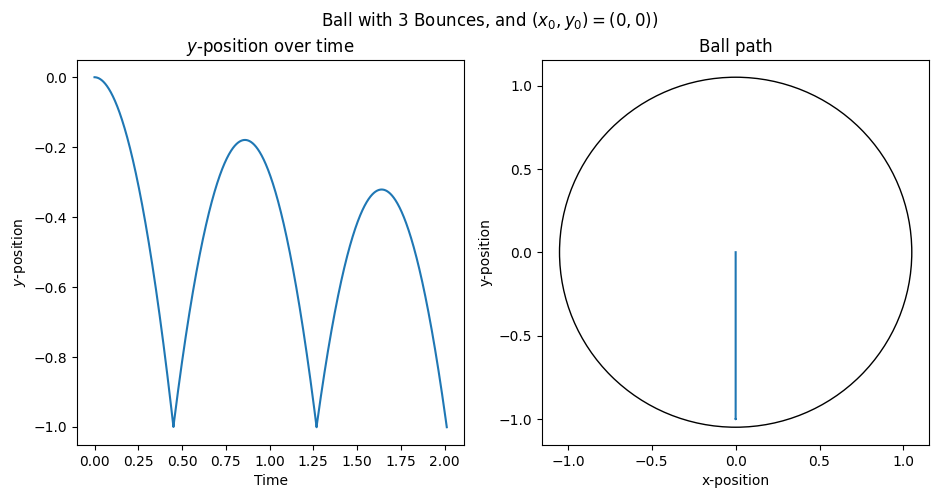

In [2]:
Ball_radius = 0.05
vars_save, t_save = mm.BounceFunction(vars = np.array([0,0,0,0]), dt = 0.001, Tmax = 10, 
                                   Restitution = 0.9, ax = 0, ay = -9.8, Max_Bounce = 3,)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5))        
fig.suptitle(f"Ball with 3 Bounces, and $(x_0, y_0) = (0, 0)$)")
ax1.plot(t_save, vars_save[1])
ax1.set_title(f"$y$-position over time")
ax1.set_xlabel("Time")
ax1.set_ylabel(f"$y$-position")

ax2.plot(vars_save[0], vars_save[1])
circle = plt.Circle((0,0), 1+Ball_radius, fill = False) 
ax2.add_patch(circle)
ax2.set_title(f"Ball path")
ax2.set_xlabel("x-position")
ax2.set_ylabel("y-position")
plt.show()

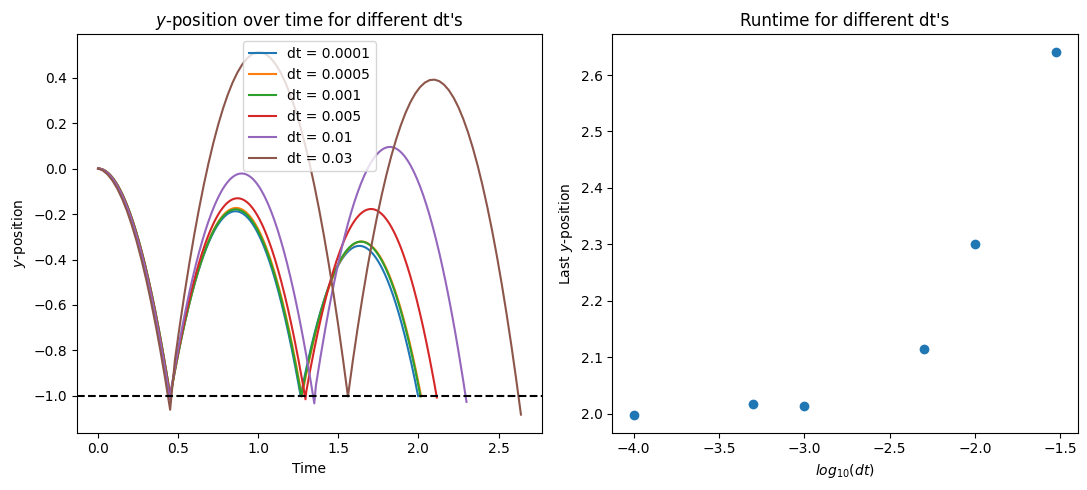

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5))       
fig.set_tight_layout(True) 

runtime = []
test_dts = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.03]
for dt in test_dts: #I run the BounceFunction for different dt's and plot the paths
    vars_save, t_save = mm.BounceFunction(vars = np.array([0,0,0,0]), dt = dt, Tmax = 10, 
                                   Restitution = 0.9, ax = 0, ay = -9.8, Max_Bounce = 3)
    ax1.plot(t_save, vars_save[1], label = f"dt = {dt}")
    runtime.append(t_save[-1]) #I save the last y-position for each dt
ax1.set_title(f"$y$-position over time for different dt's")
ax1.set_xlabel("Time")
ax1.set_ylabel(f"$y$-position")
ax1.axhline(y = -1, color = "black", linestyle = "--")
ax1.legend()

ax2.scatter(np.log10(np.asarray(test_dts)), runtime)
ax2.set_title(f"Runtime for different dt's")
ax2.set_xlabel(f"$log_{{10}}(dt)$")
ax2.set_ylabel(f"Last $y$-position")
plt.show()

It seems that the higher the value for dt, the longer it takes the ball to bounce three times (and apperently jumps higher than (0,0)?). If we look at the plot, for the runtimes at different dt's (right plot), it seems that $dt = 10^-3$ is the maximum value for dt, where the approximation is still appropriate. After that, the paths seem to deviate a lot.

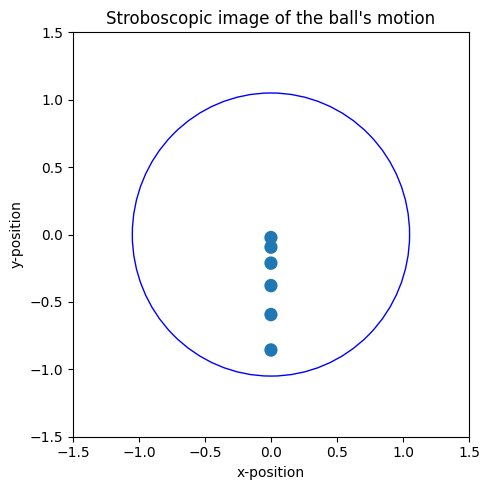

In [4]:
Ball_radius = 0.05
vars_save1, t_save1 = mm.new_BounceFunction(vars = np.array([0,0,0,0]), dt = 0.001, Tmax = 1, 
                                        Restitution = 0.9, ax = 0, ay = -9.8, Max_Bounce = 10)

fig, ax = plt.subplots()
fig.set_tight_layout(True)
fig.set_size_inches(5, 5)

large_circle = plt.Circle((0,0), 1+Ball_radius, fill = False, color = "blue")
ax.add_patch(large_circle)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_title("Stroboscopic image of the ball's motion")
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")

n = 70
stroboscopic = [mm.every_nth(vars_save1[0], n), mm.every_nth(vars_save1[1], n)] 
#The plot gets crowded with all the ball position, so i only plot every 7th position

for i in range(len(stroboscopic[0])): #I iterate through the list of ball positions and plot them
    ax.add_patch(plt.Circle((stroboscopic[0][i],stroboscopic[1][i]), Ball_radius, fill = True))


$\Large{Question \: 1b}$

In [13]:
Ball_radius, n, dt = 0.05, 40, 0.001
fig, ax = plt.subplots()
fig.set_tight_layout(True)
fig.set_size_inches(5, 5)

vars_save, t_save = mm.new_BounceFunction(vars = np.array([-0.05,0,0,0]), dt = dt, Tmax = 6, 
                                Restitution = 0.9, ax = 0, ay = -9.8, Max_Bounce = 1000)

ball_pos_anim = [mm.every_nth(vars_save[0], n), mm.every_nth(vars_save[1], n)]
t_anim = mm.every_nth(t_save, n)
#The animation gets very slow to run with all the ball positions, so i only plot every nth position

large_circle = plt.Circle((0,0), 1+Ball_radius, fill = False)
ax.add_patch(large_circle)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")

Small_ball = ax.add_patch(plt.Circle((ball_pos_anim[0][0], ball_pos_anim[1][0]), Ball_radius, fill = True))
path, = ax.plot([], [])

#Here i define the function that will be called for each frame of the animation, 
#where i plot the ball positions and the path up until that point
#I ran into trouble with different lengths of arrays, so i added the if statements
def Animation(i, ball_pos_anim):
    Small_ball.center = (ball_pos_anim[0][i], ball_pos_anim[1][i])
    Small_ball.set_color("blue")
    path.set_data(ball_pos_anim[0][:i+1], ball_pos_anim[1][:i+1])
    path.set_color("blue")
    
    ax.set_title(f"Ball path animation, t = {round(t_anim[i],2)}[s]", loc = "left")

anim = animation.FuncAnimation(fig, partial(Animation, ball_pos_anim = ball_pos_anim), 
                               frames=len(ball_pos_anim[0]), interval=dt*1000*n)
html = anim.to_html5_video()
display(HTML(html))
plt.close()


$\Large{Question \: 1c}$

In [6]:
Ball_radius, n, dt  = 0.05, 40, 0.001
fig, ax = plt.subplots()
fig.set_tight_layout(True)
fig.set_size_inches(5, 5)

vars_save1, t_save1 = mm.new_BounceFunction(vars = np.array([0.1,0,0,0]), dt = dt, Tmax = 5, 
                                Restitution = 0.95, ax = 0, ay = -9.8, Max_Bounce = 1000)
vars_save2, t_save2 = mm.new_BounceFunction(vars = np.array([0.11,0,0,0]), dt = dt, Tmax = 5, 
                                Restitution = 0.95, ax = 0, ay = -9.8, Max_Bounce = 1000)
#I choose a high Restituion coefficient, so the ball's don't end up in the bottom of the circle, 
#and the difference for the coordinates are therefore low.

ball_pos1_anim = [mm.every_nth(vars_save1[0], n), mm.every_nth(vars_save1[1], n)]
ball_pos2_anim = [mm.every_nth(vars_save2[0], n), mm.every_nth(vars_save2[1], n)]
t_anim = mm.every_nth(t_save1, n)
#The animation gets very slow to run with all the ball positions, so i only plot every nth position

large_circle = plt.Circle((0,0), 1+Ball_radius, fill = False)
ax.add_patch(large_circle)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")

Small_ball1 = ax.add_patch(plt.Circle((0,0), Ball_radius, fill = True))
path1, = ax.plot([], [])

Small_ball2 = ax.add_patch(plt.Circle((0,0), Ball_radius, fill = True))
path2, = ax.plot([], [])

#Here i define the function that will be called for each frame of the animation, 
#where i plot the ball positions and the path up until that point
#I ran into trouble with different lengths of arrays, so i added the if statements
def BallAnimation(i, ball_pos1_anim, ball_pos2_anim):
    if i < len(ball_pos1_anim[0]):
        Small_ball1.center = (ball_pos1_anim[0][i], ball_pos1_anim[1][i])
        Small_ball1.set_color("blue")
        path1.set_data(ball_pos1_anim[0][:i+1], ball_pos1_anim[1][:i+1])
        path1.set_color("blue")
    
    if i < len(ball_pos2_anim[0]):
        Small_ball2.center = (ball_pos2_anim[0][i], ball_pos2_anim[1][i])
        Small_ball2.set_color("red")
        path2.set_data(ball_pos2_anim[0][:i+1], ball_pos2_anim[1][:i+1])
        path2.set_color("red")        
    
    ax.set_title(f"Ball path animation, t = {round(t_anim[i],2)}[s]", loc = "left")

anim = animation.FuncAnimation(fig, partial(BallAnimation, ball_pos1_anim = ball_pos1_anim, ball_pos2_anim = ball_pos2_anim), 
                               frames=len(ball_pos1_anim[0]), interval=dt*1000*n)
html = anim.to_html5_video()
display(HTML(html))
plt.close()

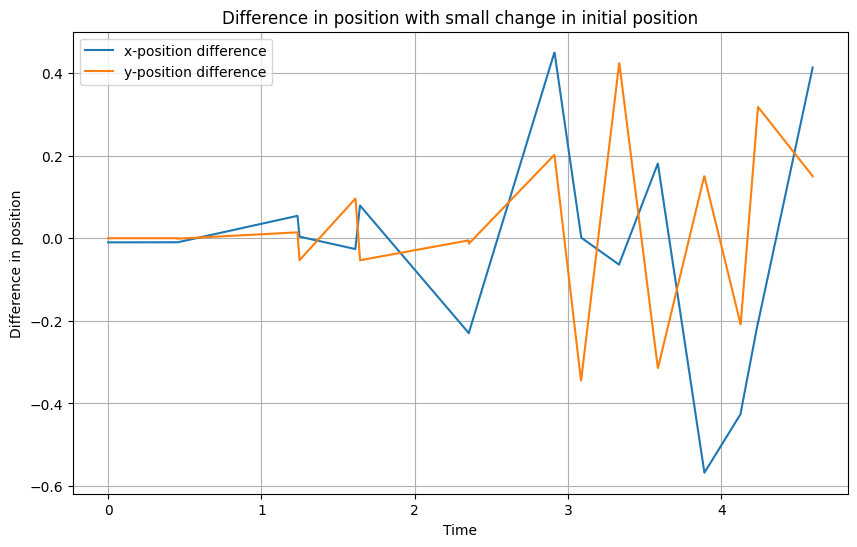

In [7]:
#Again, the trouble with different array lengths, that's why the weird indicies
difference_x = np.asarray([vars_save1[0][:len(vars_save2[0])]])-np.asarray([vars_save2[0]])
difference_y = np.asarray([vars_save1[1][:len(vars_save2[1])]])-np.asarray([vars_save2[1]])

figure = plt.figure(figsize=(10,6))
plt.plot(t_save1[:len(vars_save2[0])], difference_x[0], label = "x-position difference")
plt.plot(t_save1[:len(vars_save2[1])], difference_y[0], label = "y-position difference")

plt.title("Difference in position with small change in initial position")
plt.xlabel("Time")
plt.ylabel("Difference in position")
plt.legend()
plt.grid()
plt.show()

We observe that the balls are fairly similar in coordinates until $t\approx 2$, where the balls start to show very chaotic dynamics, that are nothing alike.

$\Large{Question \: 2a}$

C:\Users\chril\AppData\Local\Temp\ipykernel_21720\354272763.py:21: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


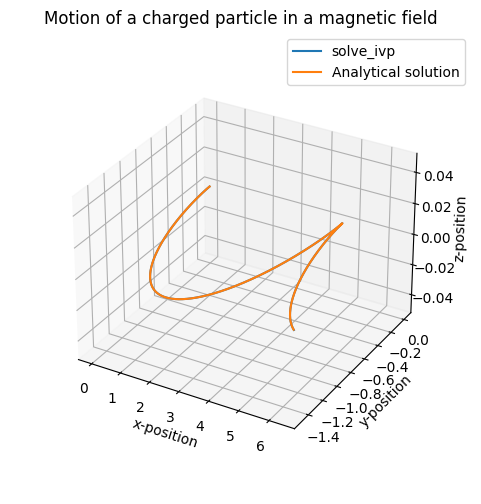

In [8]:
init_cond = np.array([-1, 1, [0, 0.6, 0], [0, 0, 0.9]], 
                     dtype = object) # [q, m, E, B]
init_vars = np.array([0, 0, 0, 0, 0, 0]) # [x, y, z, vx, vy, vz] at t=0

path, t = mm.EM_Motion(vars = init_vars, dt = 0.01, Tmax = 10, 
                    init_cond = init_cond, DerivFunction=mm.EM_derivs)

time_steps = np.arange(0, 10, 0.01) #Here i calculate the analytical solution, with the same time steps as the numerical solution
Omega = init_cond[0]*init_cond[3][2]/init_cond[1]
Analytical_path = [(1/Omega)*(-init_cond[2][1]/init_cond[3][2])*np.sin(Omega*time_steps) + init_cond[2][1]/init_cond[3][2]*time_steps,
                   (1/Omega)*(-init_cond[2][1]/init_cond[3][2])*(np.cos(Omega*time_steps)-1),
                   time_steps*0]

def EM_plot(path, label): #My function for plotting the paths
    ax.plot(path[0], path[1], path[2], label = label)

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')    
EM_plot(path, "solve_ivp")
EM_plot(Analytical_path, "Analytical solution")
ax.dist = 12
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.set_zlabel("z-position")
ax.set_title("Motion of a charged particle in a magnetic field")
ax.legend()
plt.show()

Since the time-step is low, i expect the solution to be very accurate. The solution is very accurate as expected. In order to test the boundaries of the solution, you should run the for a longer time, because that's where the errors add up. 

$\large{Question \: 2b}$
We get the $E$-field:
$\begin{equation} 
\vec{E} = -\nabla V = -\frac{\partial V}{\partial x}\hat{x}\\ -\frac{\partial V}{\partial y}\hat{y} 
\end{equation}$ 

$\begin{equation} 
= -2(x-x_0) V \hat{x} -2(y-y_0) V \hat{y}
\end{equation}$


In [9]:
init_vars = np.array([0, 0, 0, 0, 0, 0]) # [x, y, z, vx, vy, vz] at t=0
init_cond = np.array([-1, 1, [0.1, 0.1, 1], [0, 0, 1]], 
                     dtype = object) # [q, m, [x0, y0, sigma], B]
path2, t2 = mm.EM_Motion(vars = init_vars, dt = 0.01, Tmax = 20, 
                      init_cond = init_cond, DerivFunction=mm.GaussDerivFunc)

n = 10 #The particle moves very slowly, so i only plot every 10th position, but run it for 20 seconds
particle_pos_anim = [mm.every_nth(path2[0], n), mm.every_nth(path2[1], n), mm.every_nth(path2[2], n)]
t_anim = mm.every_nth(t2, n)

fig = plt.figure(figsize=(12,11))
ax = fig.add_subplot(111, projection='3d')    

ax.set_xlabel("x-position")
ax.set_xlim3d([-3,3])
ax.set_ylabel("y-position")
ax.set_ylim3d([-3,3])
ax.set_zlabel("z-position")
ax.set_zlim3d([-0.05,0.05])

def ParticleAnimation(i, particle_pos_anim): #My fairly simple function for plotting the particle path
    ax.set_title(f"Animation of charged particle in 2D Gaussian E-field, t = {t_anim[i]:.2f}")
    ax.plot(particle_pos_anim[0][:i+1], particle_pos_anim[1][:i+1], particle_pos_anim[2][:i+1], color = "blue")

partanim = animation.FuncAnimation(fig, ParticleAnimation, frames=len(particle_pos_anim[0]), fargs = [particle_pos_anim], interval=n*1000/90)
#I couldn't get the animation to work with HTML, so i saved it as a video instead
partanim.save('Particle_GaussianE.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.close()

The particle now moves in a vastly different pattern, due to the change in the E-field.

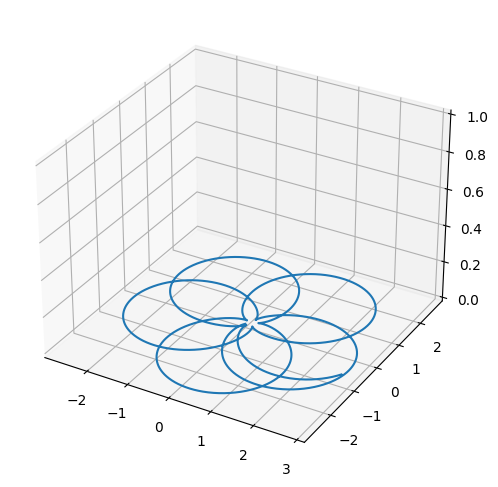

In [10]:
init_vars = np.array([0, 0, 0, 0, 0, 0])
init_cond = np.array([-1, 1, [0.1, 0.1, 1], [0, 0, 1]], 
                     dtype = object) # [q, m, [x0, y0, sigma], B]
path3, t3 = mm.EM_Motion(vars = init_vars, dt = 0.01, Tmax = 50, 
                      init_cond = init_cond, DerivFunction=mm.GaussDerivFunc)

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')    

x, y, z = np.meshgrid(np.arange(-3, 3, 1),
                      np.arange(-3, 3, 1),
                      np.arange(0))

Ex = -2*(x-init_cond[2][0])*np.exp(-((x-init_cond[2][0])**2+(y-init_cond[2][1])**2)/init_cond[2][2])
Ey = -2*(y-init_cond[2][1])*np.exp(-((x-init_cond[2][0])**2+(y-init_cond[2][1])**2)/init_cond[2][2])
Ez = 0


ax.quiver(x, y, z, Ex, Ey, Ez, color = "red")


EM_plot(path3, "solve_ivp")